This is a Jupyter notebook introducing the Qiskit framework. Here we will implement some of the concepts you have learned so far.

First we need to import some packages: 

In [2]:
from qiskit import QuantumCircuit, assemble             # necessary for designing (QuantumCircuit, assemble)
from qiskit import transpile                            # Needed for compiling circuits
from qiskit_aer import AerSimulator                     # Random generator for simulating random outcomes of quantum experiments
from qiskit.visualization import plot_histogram, plot_bloch_vector # Also visualisation never hurts
from math import sqrt, pi

As a first example, we build a quantum circuit on one qubit which prepares the $|1\rangle$ state and measures in the computational 
basis. By default all registers of quantum circuits are initialised in the state $|0\rangle$

In [3]:
qc = QuantumCircuit(1,1)  # Create a quantum circuit with one qubit and a classical register for measurement outputs
initial_state = [0,1]   # Defines initial_state as |1>; in general [a,b] for a|0>+b|1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the first qubit
qc.measure([0],[0])    #Measures the first qubit and puts the result in the first classical register

In order to compile and run the circuit need to do the following:

In [4]:
simulator = AerSimulator()                  #loads the simulator
qc_compiled = transpile(qc, simulator)      #compiles the circuit
experiment = simulator.run(qc_compiled, shots=100) # runs the experiment for any desired number of rounds (here 100)

We can now access the results of the experiment:

In [5]:
result=experiment.result()
counts = result.get_counts(qc_compiled)
print("\nTotal count for 0 and 1 are:", counts)


Total count for 0 and 1 are: {'1': 100}


Or, if you prefer a visual representation:

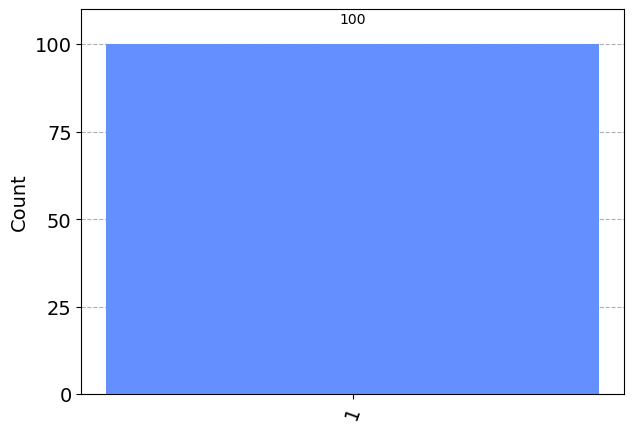

In [6]:
plot_histogram(counts)

Either way, the outcome is always '1', which comes to no surprise. Before we move on to examples with more parties, let us briefly check what happens if we add a Hadamard gate to the circuit.

In [15]:
qc = QuantumCircuit(1)           # Create a circuit with one qubit           
qc.h(0)                          # Here we apply the Hadamard gate
qc.measure_all()                 # and then measure our final state         

We can also visualize our circuit as follows

In [16]:
qc.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

if this visual representation is too bland, we can make it look a tad bit nicer by using a different renderer.

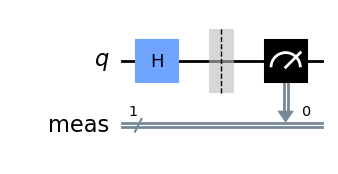

In [18]:
qc.draw(output='mpl')

now let us run the experiment again and see what outcomes we get


Total count for 0 and 1 are: {'0': 48, '1': 52}


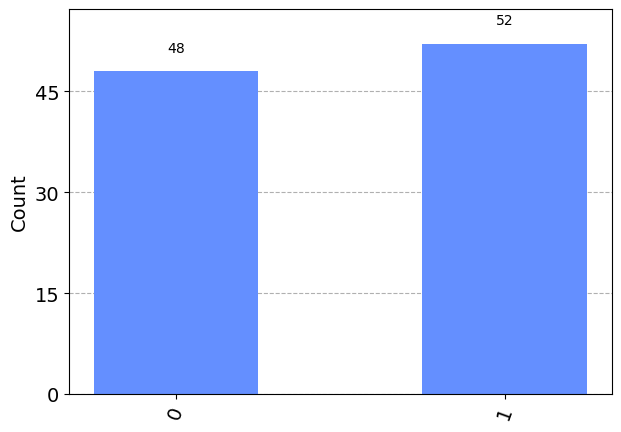

In [14]:
qc_compiled = transpile(qc, simulator)      
experiment = simulator.run(qc_compiled, shots=100) 
result=experiment.result()
counts = result.get_counts(qc_compiled)

print("\nTotal count for 0 and 1 are:", counts)
plot_histogram(counts)

In [ ]:
we thus see that both the outcomes 0 and 1 appear roughly equally 

**Exercise:** Modify the example above to perform a consistency check that the Pauli X and Z gates are related by the Hadamard gate $H$ via $X=HZH$.

Let us now move on to a slightly more complicated example, where we prepare a Bell state.

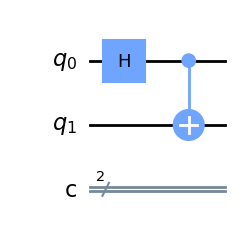

In [20]:
qc = QuantumCircuit(2,2) 
qc.h(0)
qc.cnot(0,1) # Applies a Pauli X (NOT in computational basis) to register 1, conditioned on register 0.
qc.r

qc.draw(output='mpl')

In [21]:
v=qc.measure([0,1],[0,1])
simulator = AerSimulator()                 
qc_compiled = transpile(qc, simulator)      
experiment = simulator.run(qc_compiled, shots=1000) 
result=experiment.result()
counts = result.get_counts(qc_compiled)
print("\nTotal counts", counts)


Total counts {'00': 529, '11': 471}


**Exercise 1:** Modify the circuit above to create a GHZ state on three or more parties. 

**Exercise 2:** Also familiarise yourself with the effects of other built-in gates, such as Pauli X,Y,Z, the parametrised phase gate P, or multi-qubit operations (e.g. CZ, Toffoli). Design quantum circuits which make the effect of these gates visible in the measurement statistics. (A non-example: Initialising a qubit in '0' or '1', applying the Z gate and measuring in the computational basis would lead you to believe that nothing happened at all.)